## Assignment 4 Question 2
## Name : Rahul D
## Roll no: 180102054

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
def plot3d(x,t,z,title):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(t,x)


    # Plot the surface.
    surf = ax.plot_surface(X, Y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(np.min(z), np.max(z))
    ax.set_xlabel('Time')
    ax.set_ylabel('X cordinate')
    ax.set_zlabel('U(x,t)')
    ax.set_title(title)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(title+'.png')
    plt.show()

In [3]:
#definition of numerical parameters
h = 0.1
xmin = 0.0
xmax = 1.0
N = int((xmax-xmin)/h)+1 
k = 0.01 
nsteps = 40 #number of time steps

r = k/h**2 

#initialize matrices A, B and b array
A = np.zeros((N-2,N-2))
B = np.zeros((N-2,N-2))
b = np.zeros((N-2))
#define matrices A, B and b array
for i in range(N-2):
    if i==0:
        A[i,:] = [2+2*r if j==0 else (-r) if j==1 else 0 for j in range(N-2)]
        B[i,:] = [2-2*r if j==0 else r if j==1 else 0 for j in range(N-2)]
        b[i] = 0. #boundary condition at i=1
    elif i==N-3:
        A[i,:] = [-r if j==N-4 else 2+2*r if j==N-3 else 0 for j in range(N-2)]
        B[i,:] = [r if j==N-4 else 2-2*r if j==N-3 else 0 for j in range(N-2)]
        b[i] = 0. #boundary condition at i=N
    else:
        A[i,:] = [-r if j==i-1 or j==i+1 else 2+2*r if j==i else 0 for j in range(N-2)]
        B[i,:] = [r if j==i-1 or j==i+1 else 2-2*r if j==i else 0 for j in range(N-2)]

#initialize grid
x = np.linspace(0,1,N)
#initial condition
u = np.asarray([2*xx if xx<=0.5 else 2*(1-xx) for xx in x])
#evaluate right hand side at t=0
bb = B.dot(u[1:-1]) + b
t = np.arange(0.0,0.0+k*(nsteps+1),k)

U = []
U.append(u.copy())

for j in range(nsteps):
   
    #find solution inside domain
    u[1:-1] = np.linalg.solve(A,bb)
    #update right hand side
    bb = B.dot(u[1:-1]) + b
    U.append(u.copy())
U = np.asarray(U).T

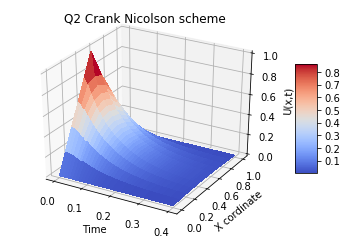

In [4]:
plot3d(x,t,U,'Q2 Crank Nicolson scheme')